In [101]:
%pip install --upgrade xgboost
%pip install scikit-learn==1.5.2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [102]:
import numpy as np
import pandas as pd
import xgboost
import sklearn
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


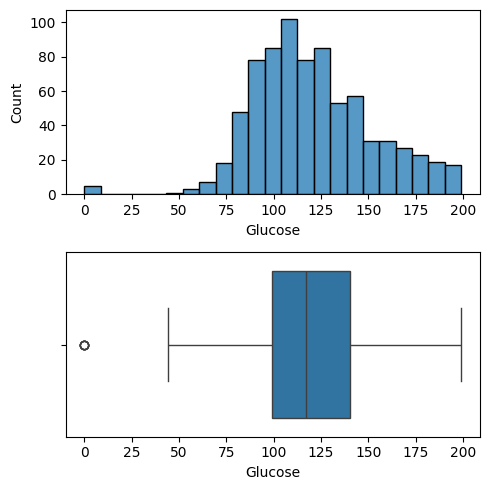

In [104]:
# Looking at glucose

fig, axis = plt.subplots(2, 1, figsize=(5,5))

sns.histplot(ax=axis[0], data=data, x='Glucose')
sns.boxplot(ax=axis[1], data=data, x='Glucose')

plt.tight_layout()
plt.show()

In [105]:
# Dropping zeros from glucose

data = data[data['Glucose'] != 0]

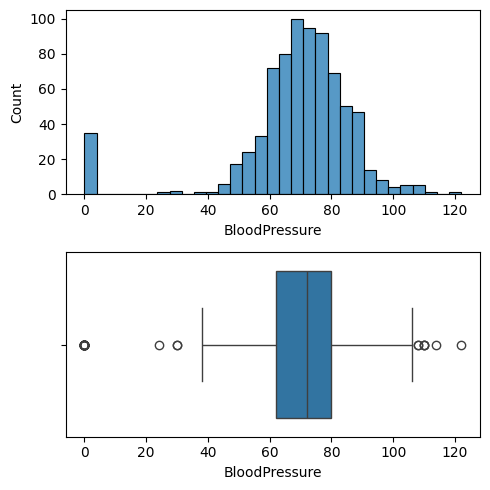

In [106]:
# Looking at blood pressure

fig, axis = plt.subplots(2, 1, figsize=(5,5))

sns.histplot(ax=axis[0], data=data, x='BloodPressure')
sns.boxplot(ax=axis[1], data=data, x='BloodPressure')

plt.tight_layout()
plt.show()

In [107]:
data['BloodPressure'].describe()

count    763.000000
mean      69.115334
std       19.399240
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [108]:
# Dropping outliers from blood pressure

data = data[(data['BloodPressure'] > 38) & (data['BloodPressure'] < 105)]

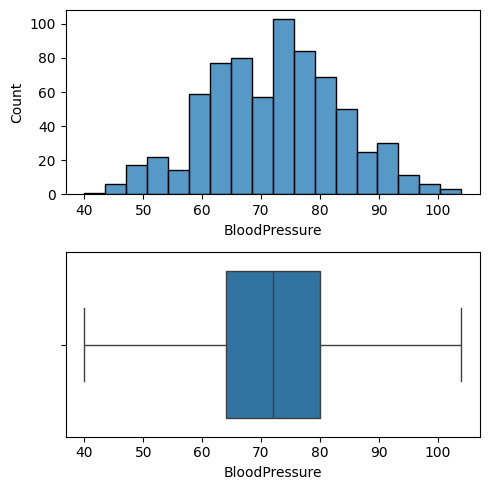

In [109]:
fig, axis = plt.subplots(2, 1, figsize=(5,5))

sns.histplot(ax=axis[0], data=data, x='BloodPressure')
sns.boxplot(ax=axis[1], data=data, x='BloodPressure')

plt.tight_layout()
plt.show()

In [110]:
# Dropping skin thickness (based on it improving results in a previous project)

data = data.drop('SkinThickness', axis=1)

In [111]:
# Creating variables for features and target

features = data.columns.tolist()
features.remove('Outcome')
target = 'Outcome'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [112]:
# Initalizing and training model

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [113]:
y_pred = model.predict(X_test)
y_pred


array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [114]:
accuracy_score(y_test, y_pred)

0.7132867132867133

In [122]:
# Hyperparameter tuning

params = {
    'n_estimators': [5, 50, 100, 200],
    'learning_rate': np.linspace(0.01, 0.03, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'max_depth': [2, 5, 10, 20, 50],
    'gamma': [0, 1, 5, 10, 20],
    'min_child_weight': [1, 3, 5, 10, 20, 50],
    'colsample_bylevel': np.linspace(0.7, 1.0, 5)
}

random_search = RandomizedSearchCV(model, params, scoring='accuracy', cv=3)

# Turning off warnings 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'subsample': np.float64(0.8), 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 50, 'learning_rate': np.float64(0.014444444444444444), 'gamma': 1, 'colsample_bylevel': np.float64(0.925)}


In [123]:
# Initalizing and training optimized model

opt_model = XGBClassifier(subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=50, learning_rate=0.014, gamma=1, colsample_bylevel=0.925, random_state=42)
opt_model.fit(X_train, y_train)
y_pred = opt_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7762237762237763